### Блок теоретических вопросов 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [3]:
df = pd.read_csv('sigma_cabs.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

In [4]:
df['Surge_Pricing_Type'].value_counts()

Surge_Pricing_Type
2    56728
3    47720
1    27214
Name: count, dtype: int64

In [5]:
df.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type', 'Type_of_Cab_B', 'Type_of_Cab_C', 'Type_of_Cab_D',
       'Type_of_Cab_E', 'Confidence_Life_Style_Index_B',
       'Confidence_Life_Style_Index_C', 'Destination_Type_B',
       'Destination_Type_C', 'Destination_Type_D', 'Destination_Type_E',
       'Destination_Type_F', 'Destination_Type_G', 'Destination_Type_H',
       'Destination_Type_I', 'Destination_Type_J', 'Destination_Type_K',
       'Destination_Type_L', 'Destination_Type_M', 'Destination_Type_N',
       'Gender_Male'],
      dtype='object')

### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты? Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [6]:
# Центрируем данные
# your code here
X_centered = X - X.mean()

In [7]:
# Выделим первые две главные компоненты
# Подсказка: используйте sklearn.decomposition.PCA
# your code here
from sklearn.decomposition import PCA
pca = PCA(2)
X_pca = pca.fit_transform(X_centered)
X_pca = pd.DataFrame(X_pca, columns=['PCA_1', 'PCA_2'])
X_pca.head()


,PCA_1,PCA_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


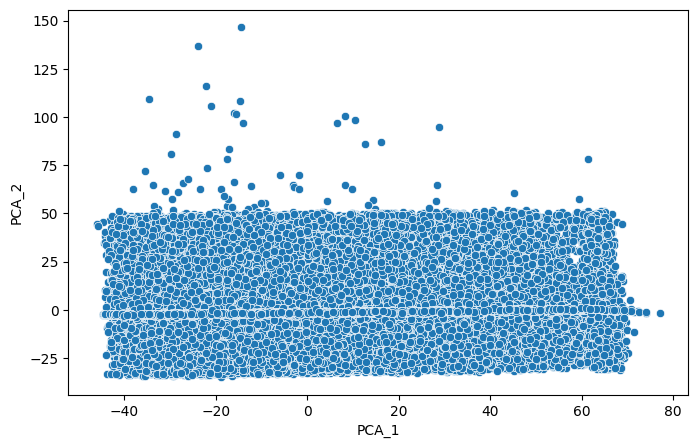

In [8]:
# Изобразим точки в новом пространстве
# your code here
fig = plt.figure()
fig.set_size_inches(8,5)
sns.scatterplot(x=X_pca['PCA_1'],y=X_pca['PCA_2']);


In [9]:
# Подсчитайте долю дисперсии, объясненную двумя компонентами
# your code here
pca.explained_variance_ratio_

array([0.63176117, 0.21129863])

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
Какие признаки коррелируют с первой компонентой? Какие со второй?

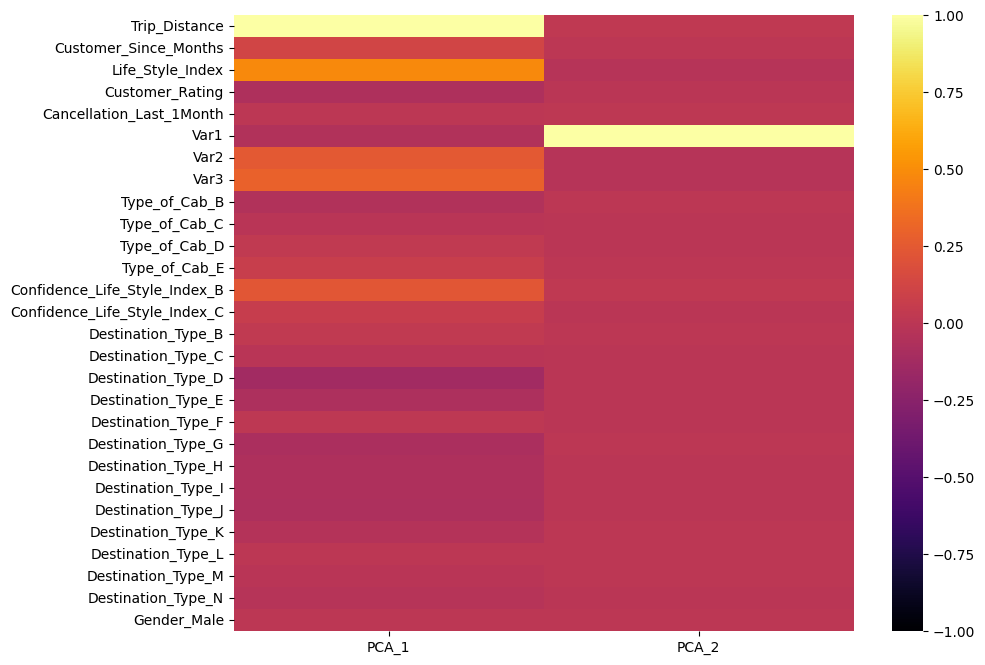

In [10]:
# Подсказка: используйте X.corrwith() и sns.heatmap для создания тепловой карты
# your code here
pc1_corr = X.corrwith(X_pca['PCA_1'])
pc2_corr = X.corrwith(X_pca['PCA_2'])

corrs = pd.concat((pc1_corr, pc2_corr), axis=1)
corrs.columns = ['PCA_1', 'PCA_2']

plt.figure(figsize=(10, 8))
sns.heatmap(corrs, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='inferno',
            vmin=-1,
            vmax=1);


**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
Какие признаки коррелируют с третьей компонентой?

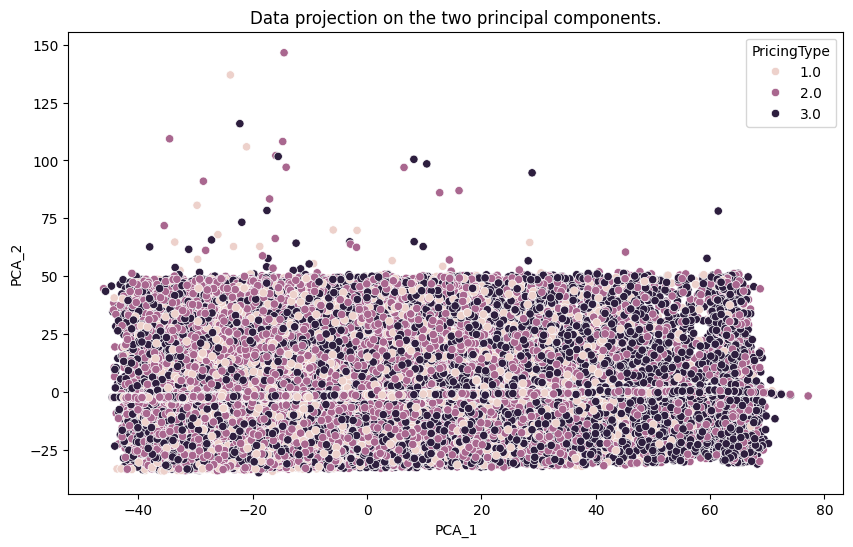

In [28]:
# Раскрасьте точки в их классы
# your code here
### Раскрасим точки в их классы

PCA_df = np.concatenate((X_pca.values, y.values.reshape(-1, 1)), axis=1)
PCA_df = pd.DataFrame(PCA_df, columns=['PCA_1', 'PCA_2', 'PricingType'])

plt.figure(figsize=(10, 6))

plt.title("Data projection on the two principal components.")
sns.scatterplot(data=PCA_df, x="PCA_1", y="PCA_2", hue="PricingType");

In [12]:
# Выделите три главные компоненты
# your code here

In [13]:
# Изобразите в 3D
# Подсказка: используйте mpl_toolkits.mplot3d.Axes3D
# your code here

In [14]:
# Найдите корреляции с третьей компонентой
# your code here

In [29]:
# Подсчитайте корреляции между главными компонентами
# your code here
X_pca.corr()

,PCA_1,PCA_2
PCA_1,1.000000e+00,-1.070332e-16
PCA_2,-1.070332e-16,1.000000e+00


**Задание 4.** Обучите логистическую регрессию на первых двух компонентах и подберите гиперпараметры. Обучите логистическую регрессию на изначальных данных. Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [30]:
# Разделите выборку на обучающую и тестовую
# your code here
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)


In [32]:
# Постройте Pipeline с PCA и LogisticRegression
# your code here
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


pipe = Pipeline([('scaler',StandardScaler()),
                 ('PCA',PCA()),
                 ('LR',LogisticRegression())
                 ])
pipe.fit(X_train,y_train)



Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA()),
                ('LR', LogisticRegression())])

In [36]:
# Подберите гиперпараметры по сетке
# your code here
from sklearn.model_selection import GridSearchCV

param_grid = {
    'LR__C' : np.linspace(0.001,100,102)
}

grid = GridSearchCV(pipe,param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_, grid.best_score_)

grid.score(X_test,y_test)

{'LR__C': np.float64(0.001)} 0.6807716712515134


0.6812364713477386

In [37]:
# Теперь создайте модель без PCA
# your code here
pipe2 = Pipeline([('scaler',StandardScaler()),
                  ('LR',LogisticRegression())
                  ])
grid2 = GridSearchCV(pipe2,param_grid=param_grid,cv=5)
grid2.fit(X_train,y_train)
print(grid2.best_params_, grid2.best_score_)

grid2.score(X_test,y_test)

{'LR__C': np.float64(0.001)} 0.6807716712515134


0.6812364713477386

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. Нарисуйте графики зависимости accuracy, f1-score от количества компонент. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке.

In [43]:
# Напишите функцию для обучения модели с произвольным числом компонентов PCA
# your code here
from sklearn.metrics import classification_report
def train_pca(n_components,X_train_,y_train_):
    pipe_ = Pipeline([
                     ('scaler',StandardScaler()),
                     ('PCA',PCA(n_components=n_components)),
                     ('LR',LogisticRegression(penalty="l2",solver="saga"))
                    ])
    param_grid_ = {
        'LR__C' : [0.0001, 0.001, 0.01, 0.1]
    }
    grid_ = GridSearchCV(pipe_,param_grid=param_grid_,cv=5)
    grid_.fit(X_train_,y_train_)
    report = classification_report(grid.predict(X_test),y_test,output_dict=True)
    return (report['accuracy'], 
        report['weighted avg']['f1-score'])

In [44]:
# Запустите цикл для обучения моделей с разными n_components
# your code here
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    accuracy, f1_score = train_pca(n_components, X_train, y_train)
    accuracy_dict[n_components] = accuracy
    f1_score_dict[n_components] = f1_score
    print()

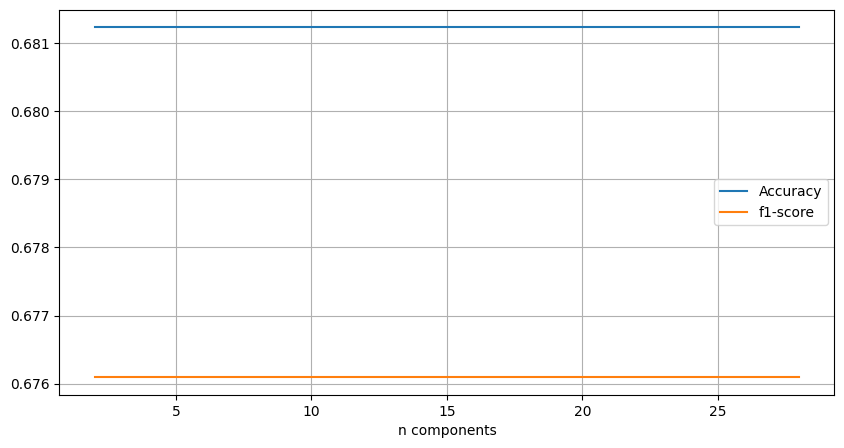

In [45]:
# Постройте графики зависимости метрик от числа компонент
# your code here
plt.figure(figsize=(10, 5))

plt.plot(components_list, accuracy_dict.values(), label='Accuracy')
plt.plot(components_list, f1_score_dict.values(), label='f1-score')

plt.xlabel('n components')
plt.legend()
plt.grid();

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [46]:
# Обучите t-SNE с двумя компонентами
# Подсказка: используйте sklearn.manifold.TSNE
# your code here
from sklearn.manifold import TSNE
tsne = TSNE(2)
tsne.fit_transform(X_centered)
X_tsne = tsne.fit_transform(X_centered)
X_tsne = pd.DataFrame(X_tsne, columns=['t-SNE_1', 't-SNE_2'])
X_tsne.head()


,t-SNE_1,t-SNE_2
0,-60.043900,-101.994339
1,-6.243719,-93.773804
2,4.708668,-18.095020
3,49.388985,2.631165
4,31.794731,-53.775585


<Axes: >

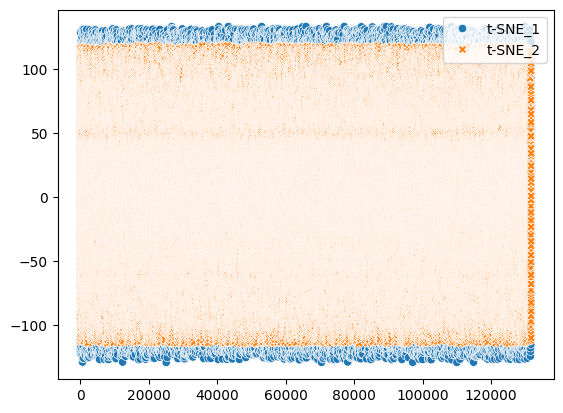

In [47]:
# Постройте scatterplot для визуализации
# your code here
sns.scatterplot(X_tsne)

**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [25]:
# Обучите t-SNE с тремя компонентами
# your code here

In [26]:
# Постройте 3D-визуализацию
# Подсказка: используйте mpl_toolkits.mplot3d.Axes3D
# your code here